In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange, array

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [5]:
housing = pd.read_csv('data/houseprice_clean.csv')
housing.shape 
# 2580 x 81

price_trimmed = pd.read_csv('data/price_trimmed.csv')
price_trimmed.shape
# 2464 x 86

size_trimmed = pd.read_csv('data/size_trimmed.csv')
size_trimmed.shape
# 2523 x 86

housing_newfeat = pd.read_csv('data/houseprice_newfeat.csv')
housing_newfeat.shape
# 2580 x 86

(2580, 86)

In [3]:
housing.columns

Index(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'K

In [120]:
housing_newfeat.columns

Index(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'K

In [10]:
housing.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,Log_SalePrice
0,856,1S_1945older,58.800593,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal,126000,11.744037
1,1049,1S_PUD,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,139500,11.845820
2,1001,1S_1945older,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Detchd,Unf,TA,Po,N,None,None,None,WD,Normal,124900,11.735269
3,1039,2S_1945older,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,None,None,None,WD,Normal,114000,11.643954
4,1665,2S_1946newer,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,227000,12.332705


## Pipeline: Model and Feature Set Comparison

In [11]:
# comparing models with different feature sets and response variables
feature_sets = {
    "Original_features": housing.drop(['SalePrice', 'Log_SalePrice'], axis=1),
    "New_features": housing_newfeat.drop(['SalePrice', 'Log_SalePrice'], axis=1)
}

target_sets = {
    "SalePrice": housing['SalePrice'],
    "Log_SalePrice": housing['Log_SalePrice']
}

In [12]:
col_transform = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), make_column_selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'), 
                 make_column_selector(dtype_include=object))], 
        verbose_feature_names_out = False
)

ridge_pipe = Pipeline(
    steps=[
        ("cols", col_transform), 
        ("regression", Ridge())]
)

lasso_pipe = Pipeline(
    steps=[
        ("cols", col_transform), 
        ("regression", Lasso())]
)

models = {'Ridge': ridge_pipe,
          'Lasso': lasso_pipe
          }

In [23]:
def test(models):
    
    cross_val_r2 = []
    cross_val_error = []
    mod_details = []
    
    for m in models:
        for f in feature_sets:
            for t in target_sets:
                X = feature_sets[f]
                y = target_sets[t]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
                cross_val_error.append(cross_val_score(models[m], X_train, y_train, 
                                                      scoring='neg_root_mean_squared_error').mean())
                cross_val_r2.append(cross_val_score(models[m], X_train, y_train, 
                                                   scoring='r2').mean())
                mod_details.append(str(m) + '_' + str(f) + '_' + str(t))
        
    results = pd.DataFrame(
                {'CV R^2': cross_val_r2,
                 'CV Error': cross_val_error
                }, index = mod_details
            )
    
    return results

test(models)

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.912e+10, tolerance: 9.542e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.449e+10, tolerance: 8.683e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

,CV R^2,CV Error
Ridge_Original_features_SalePrice,0.892251,-23338.324516
Ridge_Original_features_Log_SalePrice,0.914588,-0.110020
Ridge_New_features_SalePrice,0.889413,-23602.728703
Ridge_New_features_Log_SalePrice,0.915079,-0.109552
Lasso_Original_features_SalePrice,0.874095,-25177.935419
Lasso_Original_features_Log_SalePrice,-0.001730,-0.379394
Lasso_New_features_SalePrice,0.870786,-25477.442332
Lasso_New_features_Log_SalePrice,-0.001730,-0.379394


In [25]:
# with price outliers removed
feature_sets = {
    "Price_trimmed": price_trimmed.drop(['SalePrice', 'Log_SalePrice'], axis=1)
}

target_sets = {
    "SalePrice": price_trimmed['SalePrice'],
    "LogSalePrice": price_trimmed['Log_SalePrice'],
}

test(models)

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.723e+10, tolerance: 4.895e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.529e+10, tolerance: 4.955e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

,CV R^2,CV Error
Ridge_Price_trimmed_SalePrice,0.889456,-18051.973519
Ridge_Price_trimmed_LogSalePrice,0.896534,-0.107612
Lasso_Price_trimmed_SalePrice,0.887897,-18168.246436
Lasso_Price_trimmed_LogSalePrice,-0.005162,-0.340066


In [26]:
# with size outliers removed
feature_sets = {
    "Size_trimmed": size_trimmed.drop(['SalePrice', 'Log_SalePrice'], axis=1),
}

target_sets = {
    "SalePrice": size_trimmed['SalePrice'],
    "LogSalePrice": size_trimmed['Log_SalePrice'],
}

test(models)

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.066e+10, tolerance: 7.550e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.943e+10, tolerance: 7.654e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

,CV R^2,CV Error
Ridge_Size_trimmed_SalePrice,0.921229,-19227.572270
Ridge_Size_trimmed_LogSalePrice,0.911938,-0.110605
Lasso_Size_trimmed_SalePrice,0.917484,-19669.961587
Lasso_Size_trimmed_LogSalePrice,-0.002953,-0.374695


In [29]:
# other pipelines to test

feature_sets = {
    "Original_features": housing.drop(['SalePrice', 'Log_SalePrice'], axis=1)
}

target_sets = {
    "SalePrice": housing['SalePrice'],
    "LogSalePrice": housing['Log_SalePrice'],
}

poly_pipe = Pipeline(
    steps=[
        ('cols', col_transform),
        ('preprocessor', PolynomialFeatures(degree=2, interaction_only = True, include_bias = False)),
        ('regression', Ridge())
])


PCA_pipe = Pipeline(
    steps=[
        ('cols', col_transform),
        ('pca', PCA(n_components = 0.95)),
        ('regression', Ridge())
])

models = {'Ridge': ridge_pipe,
          'Ridge_poly': poly_pipe,
          'Ridge_PCA': PCA_pipe
          }

In [30]:
test(models)

,CV R^2,CV Error
Ridge_Original_features_SalePrice,0.892251,-23338.324516
Ridge_Original_features_LogSalePrice,0.914588,-0.110020
Ridge_poly_Original_features_SalePrice,0.833930,-28693.602314
Ridge_poly_Original_features_LogSalePrice,0.859853,-0.141228
Ridge_PCA_Original_features_SalePrice,0.880095,-24677.291404
Ridge_PCA_Original_features_LogSalePrice,0.909997,-0.112412


In [ ]:
# best model based on cross validation is a Ridge regression on sale price
# with outliers trimmed based on house size (57 observations removed)

In [31]:
housing = size_trimmed.copy()

## Feature Importance

In [39]:
# adapted from https://machinelearningmastery.com/feature-selection-for-regression-data/

In [205]:
# define feature set and target variable
features = housing.drop(['SalePrice', 'Log_SalePrice'], axis=1)
features_new = housing_newfeat.drop(['SalePrice', 'Log_SalePrice'], axis=1)
price = housing['SalePrice']

In [206]:
X = features_new

X_transformed = col_transform.fit_transform(X)
new_feat_names = col_transform.get_feature_names_out()
X = pd.DataFrame(X_transformed, columns = new_feat_names)

y = price

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=1)

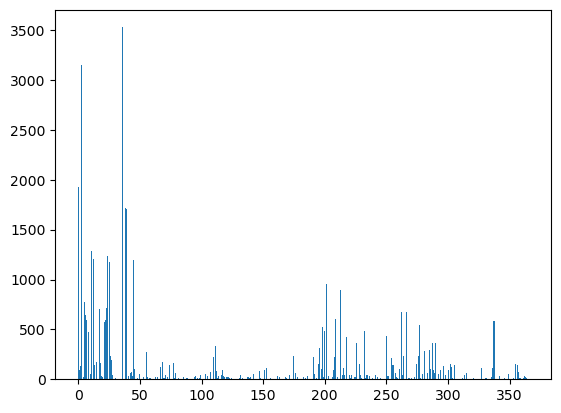

In [59]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
 
    # learn relationship from training data
    fs.fit(X_train, y_train)
 
    # transform train and test data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# plot the scores
fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [61]:
selected_features = list(X.columns[fs.get_support()]) # get scores for all features
scores = fs.scores_
feature_imp = pd.DataFrame(scores, index=selected_features)
feature_imp.columns = ['imp']
feature_imp.sort_values('imp', ascending = False).head(10)

,imp
TotalIndoorSF,3529.350366
OverallQual,3154.760838
GrLivArea,1932.523438
LivArea_sq,1721.454014
Log_LivArea,1709.399754
TotalBsmtSF,1288.978111
GarageCars,1240.461648
1stFlrSF,1203.705055
Neighborhood_Num,1196.274623
GarageArea,1172.603032


In [62]:
feature_imp[feature_imp['imp'] == 0]

,imp
MSSubClass_1halfS_PUD,0.0
MSZoning_A (agr),0.0
Neighborhood_Landmrk,0.0
Condition2_Artery,0.0
Condition2_RRAn,0.0
RoofMatl_Membran,0.0
RoofMatl_Metal,0.0
Electrical_None,0.0
Functional_Sal,0.0
PoolQC_Ex,0.0


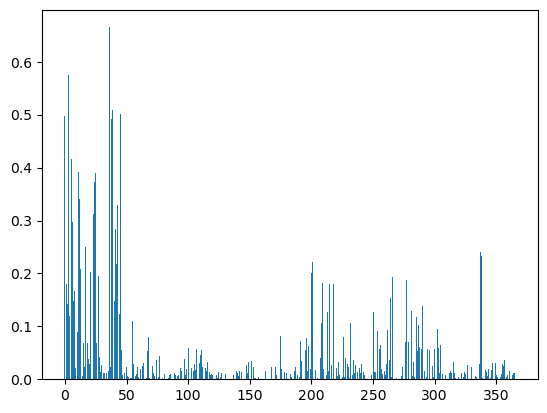

In [63]:
# same as above, with with 'mutual info regression'

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
 
    # learn relationship from training data
    fs.fit(X_train, y_train)
 
    # transform train and test data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# plot the scores
fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [64]:
# top 10 features vary slightly from above
# magnitude of scores are very different

selected_features = list(X.columns[fs.get_support()])
scores = fs.scores_
feature_imp = pd.DataFrame(scores, index=selected_features)
feature_imp.columns = ['imp']
feature_imp.sort_values('imp', ascending = False).head(10)

,imp
TotalIndoorSF,0.665101
OverallQual,0.575197
Log_LivArea,0.508781
Neighborhood_Num,0.501075
GrLivArea,0.497718
LivArea_sq,0.491789
YearBuilt,0.415738
TotalBsmtSF,0.391269
GarageArea,0.390569
GarageCars,0.372023


In [65]:
feature_imp[feature_imp['imp'] == 0]
feature_imp[feature_imp['imp'] == 0].shape

(82, 1)

In [63]:
sel_mutualreg = list(feature_imp[feature_imp['imp'] != 0].index)
feat_mutualreg = features_scaled[sel_mutualreg]
feat_mutualreg.shape

(2580, 211)

In [207]:
sel_ = SelectFromModel(Lasso(alpha = 68))
sel_.fit(X_train, y_train)

selected_feat = X.columns[(sel_.get_support())]
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 338
selected features: 124
features with coefficients shrank to zero: 213


In [208]:
selected_feat

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'GarageType_None', 'GarageFinish_Fin', 'GarageFinish_Unf',
       'GarageQual_TA', 'GarageCond_Fa', 'Fence_MnPrv',
       'SaleCondition_Abnorml', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'GarageSize_large'],
      dtype='object', length=124)

## Ridge Regression - Hyperparameter Tuning

In [ ]:
# hyperparameter tuning using X_train, y_train

In [44]:
X = housing.drop(['SalePrice', 'Log_SalePrice'], axis = 1)
y = housing['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
ridge = ridge_pipe

params1 = {"regression__alpha": [0.001, 0.01, 1, 100, 1000, 10000, 100000]} # 1
params2 = {"regression__alpha": arange(0, 100, 1)} # 11
params3 = {"regression__alpha": arange(10, 12, .1)} # 11

cv = KFold(n_splits=10, shuffle = True, random_state = 0)
gs = GridSearchCV(ridge, params3, scoring='r2', cv=cv, n_jobs = -1)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'regression__alpha': 11.499999999999995}
0.9216356009792926


In [59]:
# update pipeline with tuned hyperparameter
ridge_pipe_tuned = Pipeline(
    steps=[
        ("cols", col_transform), 
        ("regression", Ridge(alpha = 11))]
)

# estimate train/test scores
ridge = ridge_pipe_tuned
ridge.fit(X_train, y_train)

print('train R^2: {}'.format(ridge.score(X_train, y_train)))
print('test R^2: {}'.format(ridge.score(X_test, y_test)))

train R^2: 0.9394786138202964
test R^2: 0.9333538069544433


In [63]:
ridge_mod = ridge_pipe_tuned.named_steps['regression']
ridge_mod.coef_

array([ 1.38462864e+04, -2.13238018e+02,  1.09989670e+04,  6.29476060e+03,
        1.13203415e+04,  4.58560593e+03,  8.07060025e+03,  1.41417598e+03,
       -9.38057024e+02,  8.16081088e+03,  9.77745068e+03,  6.21963491e+03,
       -5.78476032e+02,  2.11816000e+02, -5.68271680e+02,  1.17661952e+03,
        1.62241581e+03, -4.61802791e+03, -1.93897564e+03,  2.15863315e+03,
        3.38468455e+03, -3.06971454e+00,  6.10198519e+03,  2.22097805e+02,
        1.46977825e+02,  3.15436695e+02,  9.08197043e+01,  1.78572703e+03,
        4.49511398e+02,  2.36920787e+02, -2.16796516e+02, -6.66242951e+02,
       -1.79724069e+03, -7.04611080e+03,  3.51258868e+03, -6.61338804e+02,
        3.31593390e+03, -6.38942289e+01,  3.18690896e+03,  4.91500212e+01,
       -8.77183946e+02,  1.78355592e+03,  3.50882008e+03,  7.30596519e+02,
       -1.78836506e+03, -6.77846396e+02,  1.43574861e+03, -1.50288871e+03,
       -1.45422186e+03, -3.84009008e+02,  3.32690323e+03, -4.50405863e+03,
       -1.53946121e+02, -

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ct = col_transform.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

alphas_ridge = arange(0, 20)
coefs_ridge = []
train_scores_ridge = []
test_scores_ridge = []

ridge = Ridge()

for alpha in alphas_ridge:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    train_scores_ridge.append(ridge.score(X_train, y_train))
    test_scores_ridge.append(ridge.score(X_test, y_test))
coefs_ridge = pd.DataFrame(coefs_ridge, index=alphas_ridge, columns=col_transform.get_feature_names_out())
coefs_ridge.head()

,GrLivArea,LotFrontage,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodel_binary,LotPercent,Neighborhood_Num,Remodel_Qual,Remodel_GrLiv,Remodel_Bath,MSSubClass_1S_1945older,MSSubClass_1S_1946newer,MSSubClass_1S_PUD,MSSubClass_1S_finishedattic,MSSubClass_1_2S_finished,MSSubClass_1_2S_unfinished,MSSubClass_1halfS_PUD,MSSubClass_2Fam_conversion,MSSubClass_2S_1945older,MSSubClass_2S_1946newer,MSSubClass_2S_PUD,MSSubClass_2halfS,MSSubClass_Multi_PUD,MSSubClass_duplex,MSSubClass_splitfoyer,MSSubClass_splitlevel,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,...,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageSize_large,GarageSize_small,Remodel_Kitch_Ex,Remodel_Kitch_Fa,Remodel_Kitch_Gd,Remodel_Kitch_Po,Remodel_Kitch_TA,Remodel_Kitch_nan
0,4.549632e+17,223.135253,8377.093375,4775.962054,11104.104985,3338.529545,-2.170416e+17,-8.444777e+16,-2.138608e+17,2.046937e+17,-3.781340e+17,-4.224761e+17,-4.370628e+16,155.781388,292.345548,1379.432137,1702.357311,-3103.405887,-464.492605,2663.589535,4940.427468,-564.144887,6041.295269,260.474505,58.329023,360.069280,251.304084,1795.528699,-7365.000724,560.584589,-116.188531,-778.074866,-6.958105e+17,-8045.594541,4.105417e+17,5905.445270,5423.025038,-1418.195544,-6.825674e+17,-6.825674e+17,-6.825674e+17,-6.825674e+17,-6.825674e+17,-6.825674e+17,-6.825674e+17,-6.825674e+17,-6.825674e+17,-6.825674e+17,-6.825674e+17,-6.825674e+17,-6.825674e+17,-1.541294e+18,-6.825674e+17,-6.825674e+17,-1.056535e+17,-1.056535e+17,-1.056535e+17,-1.056535e+17,-1.056535e+17,-1.056535e+17,-1.056535e+17,-2.452589e+18,-2.452589e+18,7.416302e+17,7.416302e+17,7.416302e+17,-1.514046e+17,-1.514046e+17,-1.514046e+17,-1.514046e+17,-1.836

Text(0, 0.5, 'slope values')

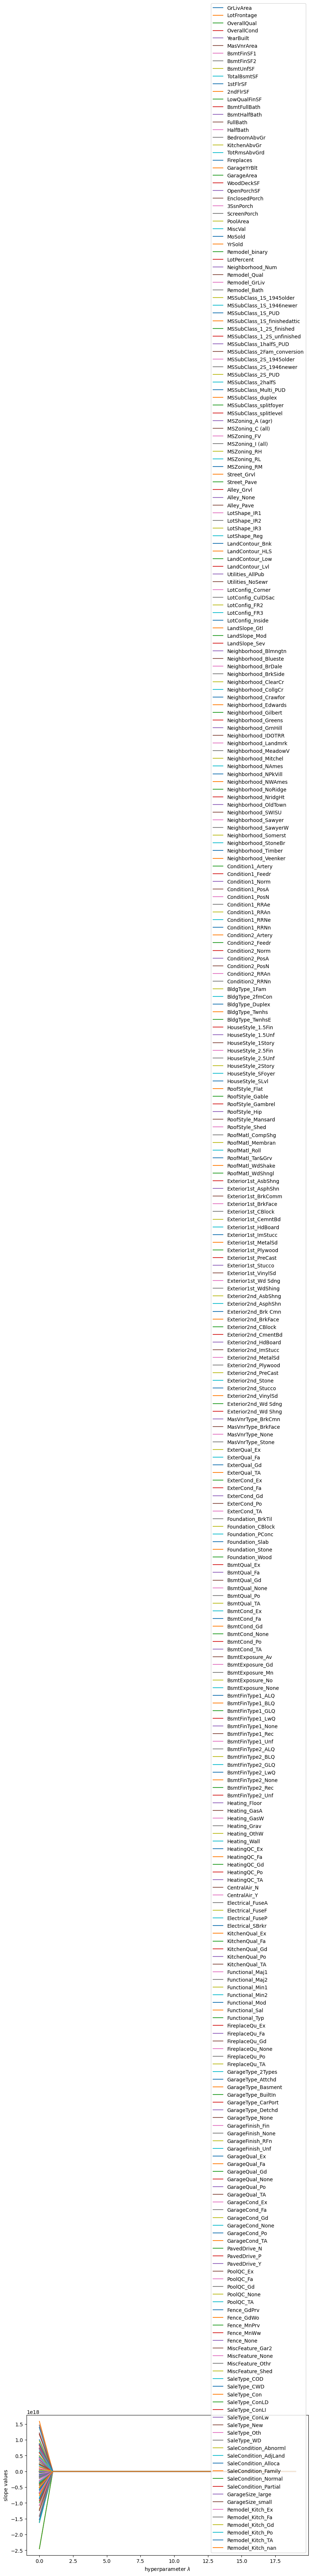

In [118]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs_ridge.columns:
    plt.plot(coefs_ridge.index, coefs_ridge[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

(0.0, 20.0)

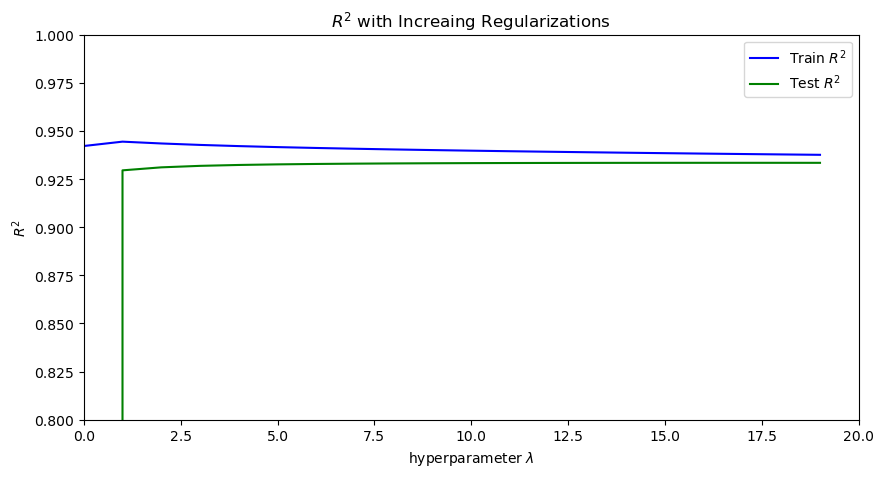

In [119]:
plt.plot(alphas_ridge, train_scores_ridge, c='b', label=r'Train $R^2$')
plt.plot(alphas_ridge, test_scores_ridge, c='g', label=r'Test $R^2$')
plt.legend(loc=1)
plt.title(r'$R^2$ with Increaing Regularizations')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.ylim((.8,1))
plt.xlim((0,20))

## Lasso Regression

In [91]:
X = housing.drop(['SalePrice', 'Log_SalePrice'], axis = 1)
y = housing['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
lasso = lasso_pipe

params1 = {"regression__alpha": [0.001, 0.01, 1, 100, 1000, 10000, 100000]} # 100
params2 = {"regression__alpha": arange(1, 1000, 10)} # 21
params3 = {"regression__alpha": arange(11, 31, 1)} #18

cv = KFold(n_splits=10, shuffle = True, random_state = 0)
gs = GridSearchCV(lasso, params3, scoring='r2', cv=cv, n_jobs = -1)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'regression__alpha': 18}
0.9217023666094682


In [97]:
# update pipeline with tuned hyperparameter
lasso_pipe_tuned = Pipeline(
    steps=[
        ("cols", col_transform), 
        ("regression", Lasso(alpha = 18))]
)

# estimate train/test scores
lasso = lasso_pipe_tuned
lasso.fit(X_train, y_train)

print('train R^2: {}'.format(lasso.score(X_train, y_train)))
print('test R^2: {}'.format(lasso.score(X_test, y_test)))

train R^2: 0.9423200172848549
test R^2: 0.9327247485021497


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ct = col_transform.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

alphas_lasso = arange(0, 20)
coefs_lasso = []
train_scores_lasso = []
test_scores_lasso = []

lasso = Lasso()

for alpha in alphas_lasso:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_scores_lasso.append(lasso.score(X_train, y_train))
    test_scores_lasso.append(lasso.score(X_test, y_test))
coefs_lasso = pd.DataFrame(coefs_lasso, index=alphas_lasso, columns=col_transform.get_feature_names_out())
coefs_lasso.head()

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_1738/4291900857.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.609e+11, tolerance: 9.551e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
 

,GrLivArea,LotFrontage,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodel_binary,LotPercent,Neighborhood_Num,Remodel_Qual,Remodel_GrLiv,Remodel_Bath,MSSubClass_1S_1945older,MSSubClass_1S_1946newer,MSSubClass_1S_PUD,MSSubClass_1S_finishedattic,MSSubClass_1_2S_finished,MSSubClass_1_2S_unfinished,MSSubClass_1halfS_PUD,MSSubClass_2Fam_conversion,MSSubClass_2S_1945older,MSSubClass_2S_1946newer,MSSubClass_2S_PUD,MSSubClass_2halfS,MSSubClass_Multi_PUD,MSSubClass_duplex,MSSubClass_splitfoyer,MSSubClass_splitlevel,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,...,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageSize_large,GarageSize_small,Remodel_Kitch_Ex,Remodel_Kitch_Fa,Remodel_Kitch_Gd,Remodel_Kitch_Po,Remodel_Kitch_TA,Remodel_Kitch_nan
0,31517.400653,-366.094044,8774.167238,6349.207478,12680.511718,3947.938234,13081.042289,3524.690625,3821.502227,2629.870081,-5105.912909,-9915.544164,-1864.088542,275.080098,-123.217708,1759.411737,1496.570603,-4056.791899,-958.679029,2337.537168,4241.549650,-948.931094,6236.932304,404.343218,373.394541,115.151693,174.562417,1657.482956,-6879.904649,209.858136,-213.982664,-795.086301,1948.071120,-7105.145791,5227.958498,2864.992303,4363.463802,-1277.016557,9197.615065,3411.917202,1741.02735,15467.692301,10877.341475,11047.236341,-17517.527877,-3781.787595,6378.646491,-27.789604,-1950.977430,14291.878423,5958.469083,-20643.544720,-543.811146,-5799.236641,39867.550375,-12067.709904,495.973480,26974.780160,1443.766342,3319.351297,-1207.539880,-13405.961678,-3.621554e-09,830.988368,496.482342,-770.354482,-304.406529,769.015784,5724.474578,-71.644853,-224.659837,-433.010790,-1991.836334,41.803141,20309.547281,2.8

Text(0, 0.5, 'slope values')

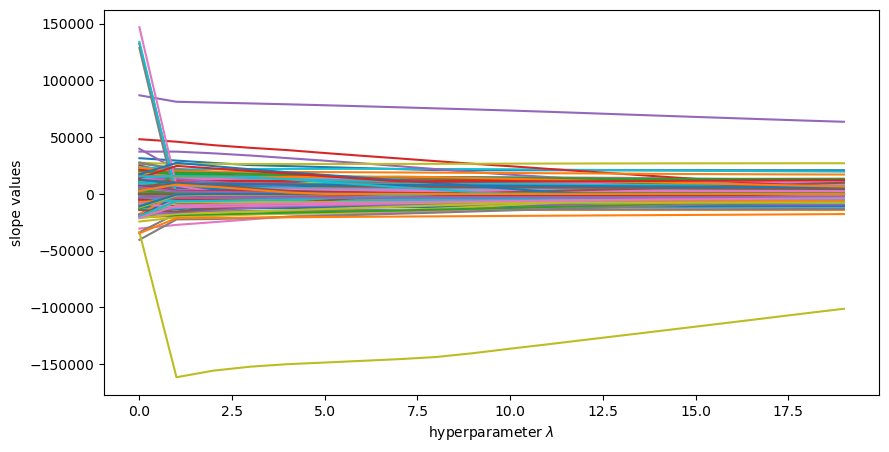

In [121]:
plt.rcParams["figure.figsize"] = (10, 5)
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.legend('',frameon=False)
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"slope values")

# plt.xlim((150, 250))

(0.0, 20.0)

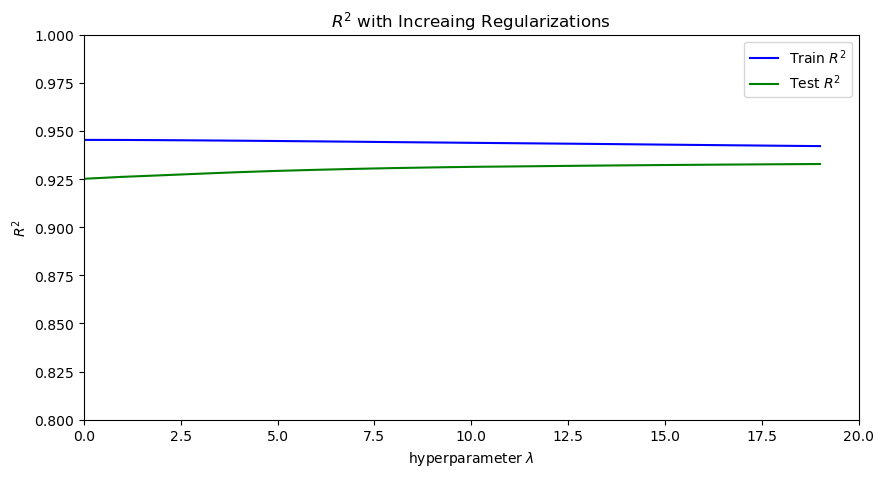

In [122]:
plt.plot(alphas_lasso, train_scores_lasso, c='b', label=r'Train $R^2$')
plt.plot(alphas_lasso, test_scores_lasso, c='g', label=r'Test $R^2$')
plt.legend(loc=1)
plt.title(r'$R^2$ with Increaing Regularizations')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.ylim((.8,1))
plt.xlim((0,20))

In [ ]:
# cols = X.columns[gs.best_estimator_.named_steps['selector'].get_support()]
# coefs = gs.best_estimator_.named_steps['model'].coef_

# coefs = pd.DataFrame(coefs, index=cols)
# coefs.columns = ['coef']
# coefs.sort_values(by = 'coef', ascending = False)

In [192]:
new_vars = gs.best_estimator_.named_steps['cols'].get_feature_names_out()

coefs_lasso = pd.DataFrame(lasso.coef_, index = new_vars, columns = ['coef'])
coefs_lasso.head()

,coef
GrLivArea,26220.666197
LotFrontage,-1399.025074
LotArea,3172.659827
OverallQual,10197.786053
OverallCond,6283.486524


In [193]:
coefs_lasso[coefs_lasso['coef'] == 0].shape

(217, 1)

In [194]:
coefs_lasso.sort_values(by = 'coef', ascending = False).head(10)

,coef
Condition2_PosA,27151.467268
ExterQual_Ex,26721.114789
GrLivArea,26220.666197
Neighborhood_StoneBr,24172.214164
KitchenQual_Ex,16754.764816
BsmtQual_Ex,16543.005800
RoofMatl_WdShngl,16343.745330
SaleCondition_Partial,14689.504269
BsmtExposure_Gd,13613.545608
Exterior1st_BrkFace,12828.498224


In [197]:
lasso_selected_features = coefs_lasso[coefs_lasso['coef'] != 0]
lasso_selected_features = lasso_selected_features.index
lasso_selected_features

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleCondition_Partial', 'GarageSize_large', 'GarageSize_small',
       'Remodel_Neighborhood_CollgCr', 'Remodel_Neighborhood_Crawfor',
       'Remodel_Neighborhood_NAmes', 'Remodel_Neighborhood_NoRidge',
       'Remodel_Neighborhood_OldTown', 'Remodel_Neighborhood_SWISU',
       'Remodel_Neighborhood_Somerst'],
      dtype='object', length=135)

## ElasticNet

In [103]:
X = housing.drop(['SalePrice', 'Log_SalePrice'], axis = 1)
y = housing['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
elastic_pipe = Pipeline(
    steps=[
        ("cols", col_transform), 
        ("regression", ElasticNet())]
)

In [109]:
elastic = elastic_pipe

params1 = {"regression__alpha": [0.001, 0.01, 1, 100, 1000, 10000, 100000],
          'regression__l1_ratio': arange(0,1.1,.1)} # 0.01, 0.4
params2 = {"regression__alpha": arange(.001, 1, .01),
          'regression__l1_ratio': [0.4]}

cv = KFold(n_splits=10, shuffle = True, random_state = 0)
gs = GridSearchCV(elastic, params2, scoring='r2', cv=cv, n_jobs = -1)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.502e+11, tolerance: 8.550e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.486e+11, tolerance: 8.880e+08
  model = cd_fast.enet_coordinate_descent(
/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

{'regression__alpha': 0.011, 'regression__l1_ratio': 0.4}
0.9216346955513959


In [110]:
# update pipeline with tuned hyperparameter
elastic_pipe_tuned = Pipeline(
    steps=[
        ("cols", col_transform), 
        ("regression", ElasticNet(alpha = .001, l1_ratio = 0.4))]
)

# estimate train/test scores
elastic = elastic_pipe_tuned
elastic.fit(X_train, y_train)

print('train R^2: {}'.format(elastic.score(X_train, y_train)))
print('test R^2: {}'.format(elastic.score(X_test, y_test)))

train R^2: 0.9442358133485939
test R^2: 0.929992514513331


/Users/emmydanforth/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.774e+11, tolerance: 9.551e+08
  model = cd_fast.enet_coordinate_descent(
